In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
data = pd.read_csv(r"C:\Users\Priya\Downloads\Landslides.csv")

In [8]:
data.head(5)

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,1,1/2/2007,NaN,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,NaN,1.0,...,24803.0,GB,EU,sGaiIKdcW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,54.549400,-3.587500,"(54.549399999999999, -3.5874999999999999)"
1,2,1/3/2007,NaN,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,...,0.0,PE,SA,S95OsumK4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-10.383800,-75.426700,"(-10.383800000000001, -75.426699999999997)"
2,3,1/5/2007,NaN,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,NaN,7.0,...,153361.0,BR,SA,D5vlNdgB7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.282346,-42.536362,"(-22.282346350000001, -42.536362050000001)"
3,4,1/5/2007,NaN,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,NaN,2.0,...,11555.0,BR,SA,h5J8IFdc4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.045200,-42.673400,"(-22.045200000000001, -42.673400000000001)"
4,5,1/5/2007,NaN,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,NaN,1.0,...,54415.0,BR,SA,s5Zb5FdB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-23.231100,-46.613600,"(-23.231100000000001, -46.613599999999998)"


In [9]:
data.columns

Index(['id', 'date', 'time', 'country', 'nearest_places', 'hazard_type',
       'landslide_type', 'trigger', 'storm_name', 'fatalities', 'injuries',
       'source_name', 'source_link', 'location_description',
       'location_accuracy', 'landslide_size', 'photos_link', 'cat_src',
       'cat_id', 'countryname', 'near', 'distance', 'adminname1', 'adminname2',
       'population', 'countrycode', 'continentcode', 'key', 'version',
       'tstamp', 'changeset_id', 'latitude', 'longitude', 'geolocation'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9564 non-null   int64  
 1   date                  9563 non-null   object 
 2   time                  4024 non-null   object 
 3   country               6167 non-null   object 
 4   nearest_places        9472 non-null   object 
 5   hazard_type           9555 non-null   object 
 6   landslide_type        9546 non-null   object 
 7   trigger               8808 non-null   object 
 8   storm_name            550 non-null    object 
 9   fatalities            8212 non-null   float64
 10  injuries              3942 non-null   float64
 11  source_name           5545 non-null   object 
 12  source_link           8233 non-null   object 
 13  location_description  4109 non-null   object 
 14  location_accuracy     9562 non-null   object 
 15  landslide_size       

In [11]:
data.describe()

,id,fatalities,injuries,cat_id,distance,population,version,changeset_id,latitude,longitude
count,9564.000000,8212.000000,3942.000000,9530.000000,9530.000000,9.530000e+03,9555.000000,9.555000e+03,9564.000000,9564.000000
mean,4824.008260,3.537141,0.852359,4806.020042,11.902521,1.568749e+05,1.121193,8.807481e+08,25.661806,3.815776
std,2799.040122,64.669763,8.280788,2792.516669,15.618193,8.272427e+05,0.326369,1.325119e+09,20.416185,100.238678
min,1.000000,0.000000,0.000000,1.000000,0.000030,0.000000e+00,1.000000,1.000000e+00,-46.774800,-170.799800
25%,2401.750000,0.000000,0.000000,2390.250000,2.367748,1.940000e+03,1.000000,1.000000e+00,13.579075,-104.920000
50%,4805.500000,0.000000,0.000000,4782.500000,6.264345,7.317000e+03,1.000000,1.000000e+00,29.855400,23.184050
75%,7253.250000,1.000000,0.000000,7222.750000,15.836362,3.374800e+04,1.000000,1.642595e+09,41.134575,94.359700
max,9685.000000,5000.000000,374.000000,9669.000000,215.448880,1.269184e+07,2.000000,4.294356e+09,72.627500,179.422100


In [12]:
data.isna().sum()

id                         0
date                       1
time                    5540
country                 3397
nearest_places            92
hazard_type                9
landslide_type            18
trigger                  756
storm_name              9014
fatalities              1352
injuries                5622
source_name             4019
source_link             1331
location_description    5455
location_accuracy          2
landslide_size           790
photos_link             8575
cat_src                   36
cat_id                    34
countryname               42
near                      35
distance                  34
adminname1               117
adminname2              3022
population                34
countrycode               44
continentcode           3810
key                       28
version                    9
tstamp                     9
changeset_id               9
latitude                   0
longitude                  0
geolocation                0
dtype: int64

# Exploratory Data Analysis

<u>Univariate Analysis<u>

In [13]:
data.country.value_counts()

United States    1444
India             890
Philippines       549
China             348
Nepal             324
                 ... 
Bermuda             1
Swaziland           1
Barbados            1
St. Lucia           1
Burkina Faso        1
Name: country, Length: 140, dtype: int64

In [14]:
country_names =  data.country.value_counts().index

In [15]:
country_values = data.country.value_counts().values

([<matplotlib.patches.Wedge at 0x221a84c11f0>,
 [Text(0.5682078973007301, 0.9418809826326696, 'United States'),
  Text(-0.9895072784245019, 0.4804948968979122, 'India'),
  Text(-0.9246854880217954, -0.5957824672159246, 'Philippines'),
  Text(-0.3873605489058231, -1.029539608345099, 'China'),
  Text(0.13007847703964018, -1.0922818270991457, 'Nepal'),
  Text(0.5788991385682352, -0.9353479498908176, 'Indonesia'),
  Text(0.8651862294398547, -0.6793031638286747, 'Brazil'),
  Text(1.007243018547485, -0.4421102821552006, 'United Kingdom'),
  Text(1.0715805580851343, -0.24842525542696337, 'Malaysia'),
  Text(1.0969865579399143, -0.08136640399537994, 'Canada')],
 [Text(0.3099315803458527, 0.5137532632541834, '32.72%'),
  Text(-0.539731242777001, 0.26208812558067934, '20.17%'),
  Text(-0.5043739025573428, -0.32497225484504977, '12.44%'),
  Text(-0.21128757213044894, -0.5615670590973266, '7.89%'),
  Text(0.07095189656707644, -0.5957900875086248, '7.34%'),
  Text(0.31576316649176456, -0.5101897908

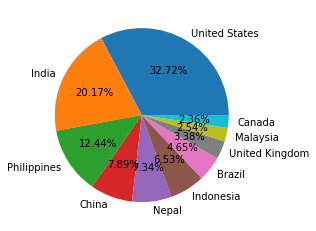

In [16]:
plt.pie(country_values[:10], labels = country_names[:10], autopct='%1.2f%%')

In [17]:
landslide_type =  data.landslide_type.value_counts().index

In [18]:
landslidetype_values = data.landslide_type.value_counts().values

([<matplotlib.patches.Wedge at 0x221a85c0670>,
 [Text(-0.6751450232259384, 0.8684349127097823, 'Landslide'),
  Text(0.3904359264037559, -1.028377259264926, 'Mudslide'),
  Text(0.9982904113195131, -0.4619699716080229, 'Rockfall'),
  Text(1.0795136926470597, -0.2113059094950019, 'Complex'),
  Text(1.09815952357558, -0.0636055090401405, 'Debris_Flow')],
 [Text(-0.36826092175960273, 0.47369177056897216, '71.03%'),
  Text(0.212965050765685, -0.5609330505081415, '19.48%'),
  Text(0.5445220425379161, -0.25198362087710335, '5.17%'),
  Text(0.5888256505347597, -0.11525776881545555, '2.47%'),
  Text(0.5989961037684981, -0.03469391402189482, '1.84%')])

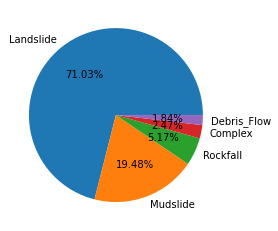

In [19]:
plt.pie(landslidetype_values[:5], labels = landslide_type[:5], autopct='%1.2f%%')

In [20]:
trigger_type =  data.trigger.value_counts().index

In [21]:
trigger_values = data.trigger.value_counts().values

([<matplotlib.patches.Wedge at 0x221a861fbb0>,
 [Text(-0.107600951024657, 1.094724639047916, 'Downpour'),
  Text(-0.6704955664158524, -0.8720296413635751, 'Rain'),
  Text(0.3726698259852, -1.0349479217816522, 'Unknown'),
  Text(0.8123378794555661, -0.7416920989208623, 'Tropical_Cyclone'),
  Text(1.036129462017296, -0.36937208603215904, 'Continuous_rain'),
  Text(1.0942086939414206, -0.11272681181959639, 'Monsoon'),
  Text(1.0995540808588657, -0.03131809806829138, 'Earthquake')],
 [Text(-0.05869142783163108, 0.5971225303897723, '53.12%'),
  Text(-0.3657248544086467, -0.4756525316528591, '22.90%'),
  Text(0.20327445053738177, -0.5645170482445375, '8.97%'),
  Text(0.44309338879394516, -0.4045593266841067, '6.48%'),
  Text(0.5651615247367069, -0.20147568329026855, '6.18%'),
  Text(0.5968411057862294, -0.06148735190159802, '1.45%'),
  Text(0.5997567713775631, -0.017082598946340753, '0.91%')])

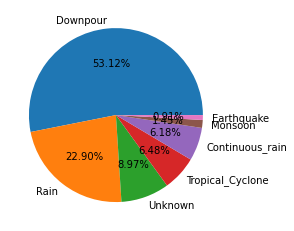

In [22]:
plt.pie(trigger_values[:7], labels = trigger_type[:7], autopct='%1.2f%%')

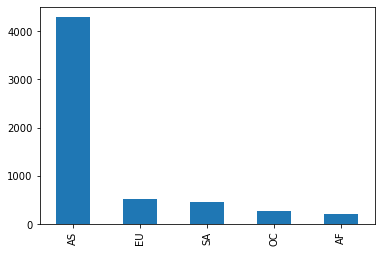

In [23]:
continents=data["continentcode"].value_counts().plot.bar()

<u>Analysis of Date<u>

In [24]:
data1=data

In [25]:
data1["date"] = pd.to_datetime(data1["date"])
data1["date"]

0      2007-01-02
1      2007-01-03
2      2007-01-05
3      2007-01-05
4      2007-01-05
          ...    
9559   2008-08-30
9560   2008-08-30
9561   2011-07-03
9562   2011-07-03
9563   2011-07-03
Name: date, Length: 9564, dtype: datetime64[ns]

In [26]:
data1["year"] = data1["date"].dt.year
data1["month"] = data1["date"].dt.month
data1.head(2)

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation,year,month
0,1,2007-01-02,NaN,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,NaN,1.0,...,EU,sGaiIKdcW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,54.5494,-3.5875,"(54.549399999999999, -3.5874999999999999)",2007.0,1.0
1,2,2007-01-03,NaN,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,...,SA,S95OsumK4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-10.3838,-75.4267,"(-10.383800000000001, -75.426699999999997)",2007.0,1.0


In [27]:
data1.year.value_counts()

2010.0    1544
2015.0    1369
2011.0    1327
2013.0    1132
2014.0    1037
2016.0     912
2012.0     794
2008.0     554
2009.0     431
2007.0     416
2006.0      15
1998.0      12
1997.0      10
1996.0       2
2003.0       2
2005.0       2
1993.0       1
1995.0       1
1988.0       1
2004.0       1
Name: year, dtype: int64

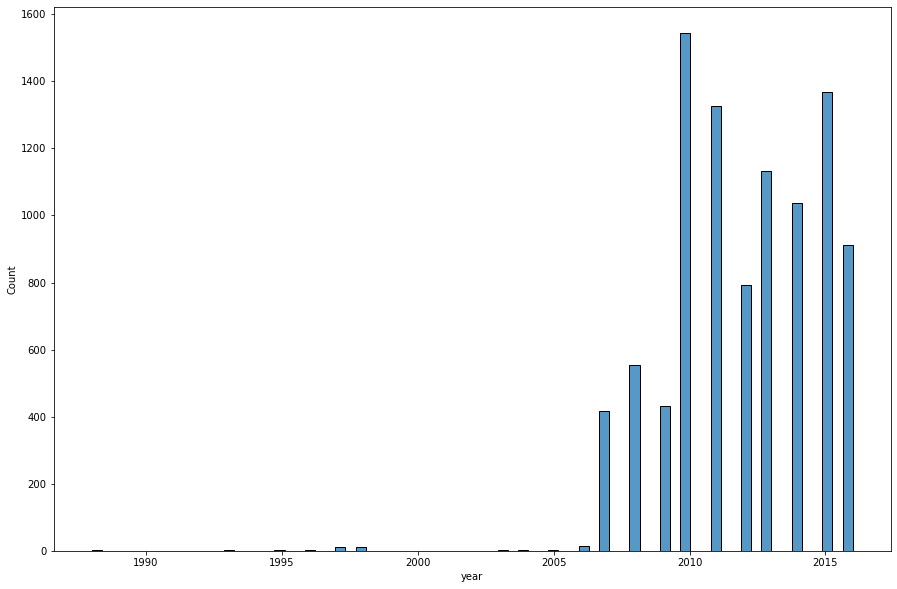

In [28]:
plt.figure(figsize=(15,10))
sns.histplot(x='year', data=data1, )
plt.show()

In [29]:
data1.month.value_counts()

7.0     1162
8.0     1099
12.0     859
9.0      844
6.0      826
3.0      796
1.0      773
10.0     726
4.0      653
5.0      649
2.0      596
11.0     580
Name: month, dtype: int64

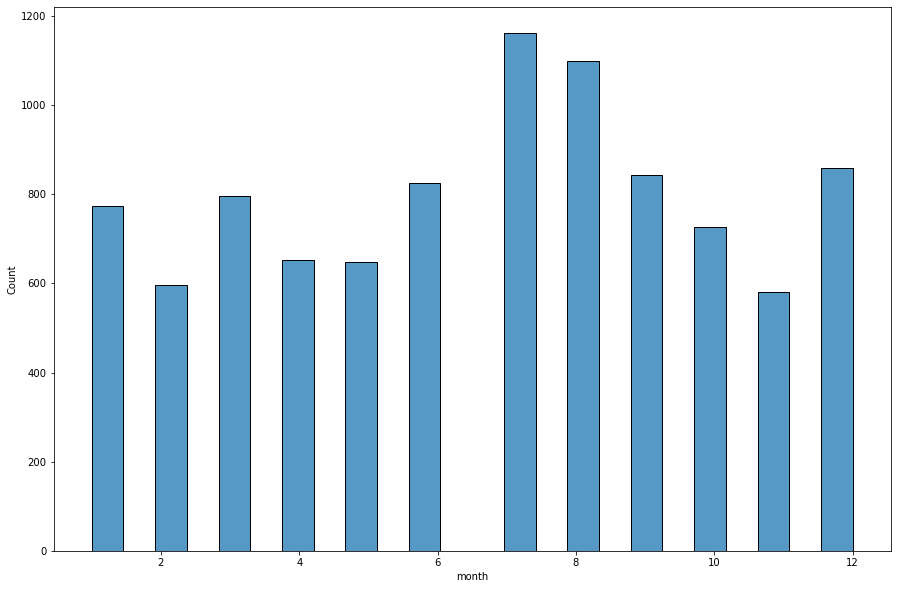

In [30]:
plt.figure(figsize=(15,10))
sns.histplot(x='month', data=data1, )
plt.show()

In [31]:
continent_monthwise = data1.groupby(['month', 'continentcode' ]).size().reset_index().rename(columns={0:'Count'})

In [32]:
continent_monthwise

,month,continentcode,Count
0,1.0,AF,7
1,1.0,AS,226
2,1.0,EU,55
3,1.0,OC,44
4,1.0,SA,64
5,2.0,AF,5
6,2.0,AS,196
7,2.0,EU,62
8,2.0,OC,12
9,2.0,SA,26


<AxesSubplot:xlabel='month', ylabel='count'>

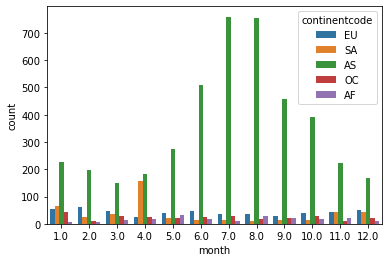

In [33]:
sns.countplot(x ='month', hue = "continentcode", data = data1)

# Data Preprocessing

<u>Fixing the missing values<u>

In [34]:
data1.isna().sum()

id                         0
date                       1
time                    5540
country                 3397
nearest_places            92
hazard_type                9
landslide_type            18
trigger                  756
storm_name              9014
fatalities              1352
injuries                5622
source_name             4019
source_link             1331
location_description    5455
location_accuracy          2
landslide_size           790
photos_link             8575
cat_src                   36
cat_id                    34
countryname               42
near                      35
distance                  34
adminname1               117
adminname2              3022
population                34
countrycode               44
continentcode           3810
key                       28
version                    9
tstamp                     9
changeset_id               9
latitude                   0
longitude                  0
geolocation                0
year          

We need to fix these columns one by one.

First we will try to fix the column "country". Since there is another column named "countryname" with only 42 values missing, the former column is dropped and later column is kept. The missing values in the column "countryname" is filled manually.

We enter the missing country names manually and reload the file

In [35]:
data2 = pd.read_csv(r"C:\Users\Priya\Documents\Landslides1.csv")
data2.head(2)

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,427,1/15/2008,NaN,United Arab Emirates,Al Ramla area of Umm Al Quwain,landslide,Landslide,Rain,NaN,NaN,...,44411.0,AE,AS,sJte2QgQ7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,25.5768,55.6520,"(25.576799999999999, 55.652000000000001)"
1,5978,3/31/2014,afternoon,Afghanistan,Kohistan,landslide,Landslide,Rain,NaN,0.0,...,65000.0,AF,AS,h9w-wC7_z_uS,1.0,Sun Aug 24 2014 00:00:00 GMT+0000 (UTC),1.0,35.3047,69.5546,"(35.304699999999997, 69.554599999999994)"


In [36]:
data2.isna().sum()

id                         0
date                       1
time                    5540
country                 3397
nearest_places            92
hazard_type                9
landslide_type            18
trigger                  756
storm_name              9014
fatalities              1352
injuries                5622
source_name             4019
source_link             1331
location_description    5455
location_accuracy          2
landslide_size           790
photos_link             8575
cat_src                   36
cat_id                    34
countryname                0
near                       0
distance                  34
adminname1               117
adminname2              3022
population                34
countrycode                2
continentcode              0
key                       28
version                    9
tstamp                     9
changeset_id               9
latitude                   0
longitude                  0
geolocation                0
dtype: int64

Since the columns time, country, storm_name, source_name, source_link,photos_link, adminname1, adminname2, key, tstamp are irrelevant as far as classification models are concerned. So these columns are dropped.

In [37]:
data2.drop(['time','country', 'storm_name', 'source_name', 'source_link', 'photos_link', 'adminname1', 'adminname2', 'key', 'version', 'tstamp'], axis=1, inplace=True)
data2.head(2)

,id,date,nearest_places,hazard_type,landslide_type,trigger,fatalities,injuries,location_description,location_accuracy,...,countryname,near,distance,population,countrycode,continentcode,changeset_id,latitude,longitude,geolocation
0,427,1/15/2008,Al Ramla area of Umm Al Quwain,landslide,Landslide,Rain,NaN,NaN,NaN,Known_within_10_km,...,United Arab Emirates,Umm al Qaywayn,9.82121,44411.0,AE,AS,1.0,25.5768,55.6520,"(25.576799999999999, 55.652000000000001)"
1,5978,3/31/2014,Kohistan,landslide,Landslide,Rain,0.0,0.0,Above_road,Known_within_50_km,...,Afghanistan,BƒÅzƒÅrak,3.70061,65000.0,AF,AS,1.0,35.3047,69.5546,"(35.304699999999997, 69.554599999999994)"


In [38]:
data2.isna().sum()

id                         0
date                       1
nearest_places            92
hazard_type                9
landslide_type            18
trigger                  756
fatalities              1352
injuries                5622
location_description    5455
location_accuracy          2
landslide_size           790
cat_src                   36
cat_id                    34
countryname                0
near                       0
distance                  34
population                34
countrycode                2
continentcode              0
changeset_id               9
latitude                   0
longitude                  0
geolocation                0
dtype: int64

We have to fill in missing values from column 'continentcode'

On evaluating the continent column, it was understood that North America was abbrevated as NA which the interpreter interpreted as Not Available. So NA was renamed as NAM and file was reloaded.

In [39]:
data3 = pd.read_csv(r"C:\Users\Priya\Documents\Landslides1.csv")
data3.head(2)

,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,427,1/15/2008,NaN,United Arab Emirates,Al Ramla area of Umm Al Quwain,landslide,Landslide,Rain,NaN,NaN,...,44411.0,AE,AS,sJte2QgQ7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,25.5768,55.6520,"(25.576799999999999, 55.652000000000001)"
1,5978,3/31/2014,afternoon,Afghanistan,Kohistan,landslide,Landslide,Rain,NaN,0.0,...,65000.0,AF,AS,h9w-wC7_z_uS,1.0,Sun Aug 24 2014 00:00:00 GMT+0000 (UTC),1.0,35.3047,69.5546,"(35.304699999999997, 69.554599999999994)"


In [40]:
data3.drop(['time','country', 'storm_name', 'source_name', 'source_link', 'photos_link', 'adminname1', 'adminname2', 'key', 'version', 'tstamp', 'location_description', 'nearest_places'], axis=1, inplace=True)
data3.head(2)


,id,date,hazard_type,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,cat_src,...,countryname,near,distance,population,countrycode,continentcode,changeset_id,latitude,longitude,geolocation
0,427,1/15/2008,landslide,Landslide,Rain,NaN,NaN,Known_within_10_km,Medium,glc,...,United Arab Emirates,Umm al Qaywayn,9.82121,44411.0,AE,AS,1.0,25.5768,55.6520,"(25.576799999999999, 55.652000000000001)"
1,5978,3/31/2014,landslide,Landslide,Rain,0.0,0.0,Known_within_50_km,Small,glc,...,Afghanistan,BƒÅzƒÅrak,3.70061,65000.0,AF,AS,1.0,35.3047,69.5546,"(35.304699999999997, 69.554599999999994)"


In [41]:
data3.isna().sum()

id                      0
date                    1
hazard_type             9
landslide_type         18
trigger               756
fatalities           1352
injuries             5622
location_accuracy       2
landslide_size        790
cat_src                36
cat_id                 34
countryname             0
near                    0
distance               34
population             34
countrycode             2
continentcode           0
changeset_id            9
latitude                0
longitude               0
geolocation             0
dtype: int64

Columns 'fatalities' and 'injuries'

<AxesSubplot:ylabel='Density'>

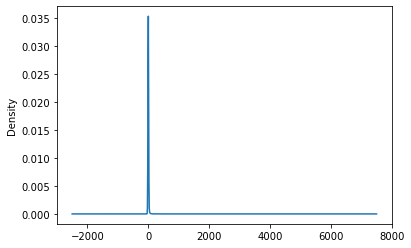

In [42]:
data3['fatalities'].plot(kind='kde')


<AxesSubplot:ylabel='Density'>

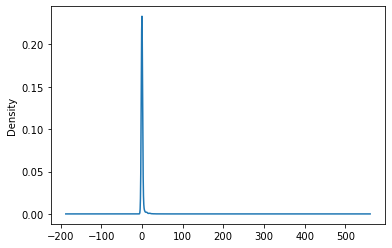

In [43]:
data3['injuries'].plot(kind='kde')

From the above, it is clear that the fatalities and injuries values are normally distributed. So we can use the mean value to fill the blank cells. 

In [44]:
data3['fatalities']=data3['fatalities'].fillna(data3['fatalities'].median())

In [45]:
data3['injuries']=data3['injuries'].fillna(data3['injuries'].median())

In [46]:
data3.head(2)

,id,date,hazard_type,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,cat_src,...,countryname,near,distance,population,countrycode,continentcode,changeset_id,latitude,longitude,geolocation
0,427,1/15/2008,landslide,Landslide,Rain,0.0,0.0,Known_within_10_km,Medium,glc,...,United Arab Emirates,Umm al Qaywayn,9.82121,44411.0,AE,AS,1.0,25.5768,55.6520,"(25.576799999999999, 55.652000000000001)"
1,5978,3/31/2014,landslide,Landslide,Rain,0.0,0.0,Known_within_50_km,Small,glc,...,Afghanistan,BƒÅzƒÅrak,3.70061,65000.0,AF,AS,1.0,35.3047,69.5546,"(35.304699999999997, 69.554599999999994)"


In [47]:
data3.isna().sum()

id                     0
date                   1
hazard_type            9
landslide_type        18
trigger              756
fatalities             0
injuries               0
location_accuracy      2
landslide_size       790
cat_src               36
cat_id                34
countryname            0
near                   0
distance              34
population            34
countrycode            2
continentcode          0
changeset_id           9
latitude               0
longitude              0
geolocation            0
dtype: int64

The columns hazard_type, landslide_type and trigger can be filled by using mode

In [48]:
data3['hazard_type']= data['hazard_type'].fillna(data['hazard_type'].mode()[0])
data3['landslide_type']= data['landslide_type'].fillna(data['landslide_type'].mode()[0])
data3['trigger']= data['trigger'].fillna(data['trigger'].mode()[0])

In [49]:
data3.head(1)

,id,date,hazard_type,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,cat_src,...,countryname,near,distance,population,countrycode,continentcode,changeset_id,latitude,longitude,geolocation
0,427,1/15/2008,landslide,Landslide,Rain,0.0,0.0,Known_within_10_km,Medium,glc,...,United Arab Emirates,Umm al Qaywayn,9.82121,44411.0,AE,AS,1.0,25.5768,55.652,"(25.576799999999999, 55.652000000000001)"


In [50]:
data3.isna().sum()

id                     0
date                   1
hazard_type            0
landslide_type         0
trigger                0
fatalities             0
injuries               0
location_accuracy      2
landslide_size       790
cat_src               36
cat_id                34
countryname            0
near                   0
distance              34
population            34
countrycode            2
continentcode          0
changeset_id           9
latitude               0
longitude              0
geolocation            0
dtype: int64

In [51]:
data3['landslide_size']= data['landslide_size'].fillna(data['landslide_size'].mode()[0])
data3['location_accuracy']= data['location_accuracy'].fillna(data['location_accuracy'].mode()[0])
data3['cat_src']= data['cat_src'].fillna(data['cat_src'].mode()[0])

data3.isna().sum()

In [52]:
data3['cat_id']= data['cat_id'].fillna(data['cat_id'].mode()[0])
data3['distance']= data['distance'].fillna(data['distance'].mode()[0])
data3['population']= data['population'].fillna(data['population'].median())


In [53]:
data3.isna().sum()

id                   0
date                 1
hazard_type          0
landslide_type       0
trigger              0
fatalities           0
injuries             0
location_accuracy    0
landslide_size       0
cat_src              0
cat_id               0
countryname          0
near                 0
distance             0
population           0
countrycode          2
continentcode        0
changeset_id         9
latitude             0
longitude            0
geolocation          0
dtype: int64

In [54]:
data3['date']= data['date'].fillna(data['date'].mode()[0])
data3['changeset_id']= data['changeset_id'].fillna(data['changeset_id'].mode()[0])

In [55]:
data3["date"] = pd.to_datetime(data3["date"])
data3["date"]

0      2007-01-02
1      2007-01-03
2      2007-01-05
3      2007-01-05
4      2007-01-05
          ...    
9559   2008-08-30
9560   2008-08-30
9561   2011-07-03
9562   2011-07-03
9563   2011-07-03
Name: date, Length: 9564, dtype: datetime64[ns]

In [56]:
data3["year"] = data3["date"].dt.year
data3["month"] = data3["date"].dt.month
data3.head(2)

,id,date,hazard_type,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,cat_src,...,distance,population,countrycode,continentcode,changeset_id,latitude,longitude,geolocation,year,month
0,427,2007-01-02,landslide,Landslide,Rain,0.0,0.0,Known_within_5_km,Medium,glc,...,0.22405,24803.0,AE,AS,1.0,25.5768,55.6520,"(25.576799999999999, 55.652000000000001)",2007,1
1,5978,2007-01-03,landslide,Complex,Rain,0.0,0.0,Unknown,Medium,glc,...,12.26171,0.0,AF,AS,1.0,35.3047,69.5546,"(35.304699999999997, 69.554599999999994)",2007,1


In [57]:
data3.drop(['date', 'id','changeset_id', 'geolocation'], axis=1, inplace=True)
data3.head(2)

,hazard_type,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,cat_src,cat_id,countryname,near,distance,population,countrycode,continentcode,latitude,longitude,year,month
0,landslide,Landslide,Rain,0.0,0.0,Known_within_5_km,Medium,glc,1.0,United Arab Emirates,Umm al Qaywayn,0.22405,24803.0,AE,AS,25.5768,55.6520,2007,1
1,landslide,Complex,Rain,0.0,0.0,Unknown,Medium,glc,2.0,Afghanistan,BƒÅzƒÅrak,12.26171,0.0,AF,AS,35.3047,69.5546,2007,1


All the missing values have been found out and filled.

<u>Label Encoding<u>

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data3['hazard_type']= le.fit_transform(data3['hazard_type'])
data3['landslide_type']= le.fit_transform(data3['landslide_type'])
data3['trigger']= le.fit_transform(data3['trigger'])
data3['location_accuracy']= le.fit_transform(data3['location_accuracy'])
data3['cat_src']= le.fit_transform(data3['cat_src'])
data3['countryname']= le.fit_transform(data3['countryname'])
data3['countrycode']= le.fit_transform(data3['countrycode'])
data3['continentcode']= le.fit_transform(data3['continentcode'])
data3['year']= le.fit_transform(data3['year'])
data3['month']= le.fit_transform(data3['month'])
data3['landslide_size']= le.fit_transform(data3['landslide_size'])
data3['near']= le.fit_transform(data3['near'])
data3.head(10)

,hazard_type,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,cat_src,cat_id,countryname,near,distance,population,countrycode,continentcode,latitude,longitude,year,month
0,1,5,13,0.0,0.0,34,1,0,1.0,132,4022,0.22405,24803.0,0,1,25.5768,55.6520,10,0
1,1,0,13,0.0,0.0,37,1,0,2.0,0,571,12.26171,0.0,1,1,35.3047,69.5546,10,0
2,1,5,13,0.0,0.0,19,0,0,3.0,0,783,0.63016,153361.0,1,1,37.3888,69.8255,10,0
3,1,5,13,52.0,0.0,6,1,0,4.0,0,997,14.05144,11555.0,1,1,37.8860,70.2202,10,0
4,1,5,13,2100.0,0.0,32,1,0,5.0,0,1321,10.07582,54415.0,1,1,37.0133,70.3589,10,0
5,1,5,13,114.0,0.0,32,1,0,6.0,0,1734,19.21263,0.0,1,1,34.5353,69.1696,10,0
6,1,5,13,4.0,0.0,6,1,0,7.0,0,1772,5.87279,64409.0,1,1,34.9376,70.7540,10,0
7,1,0,13,0.0,0.0,19,1,0,8.0,0,1834,42.08436,0.0,1,1,35.7508,68.8479,10,0
8,1,5,16,5.0,0.0,19,1,0,9.0,0,2601,0.49587,6148.0,1,1,38.0000,71.0000,10,0
9,1,5,13,0.0,0.0,6,0,0,10.0,0,2357,2.83392,25775.0,1,1,37.4947,70.4417,10,0


In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
std_lat=sc.fit_transform(data3[["latitude"]])
data3.loc[:,["latitude"]]=std_lat
std_long=sc.fit_transform(data3[["longitude"]])
data3.loc[:,["longitude"]]=std_lat
data3

,hazard_type,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,cat_src,cat_id,countryname,near,distance,population,countrycode,continentcode,latitude,longitude,year,month
0,1,5,13,0.0,0.0,34,1,0,1.0,132,4022,0.22405,24803.0,0,1,-0.004164,-0.004164,10,0
1,1,0,13,0.0,0.0,37,1,0,2.0,0,571,12.26171,0.0,1,1,0.472341,0.472341,10,0
2,1,5,13,0.0,0.0,19,0,0,3.0,0,783,0.63016,153361.0,1,1,0.574427,0.574427,10,0
3,1,5,13,52.0,0.0,6,1,0,4.0,0,997,14.05144,11555.0,1,1,0.598781,0.598781,10,0
4,1,5,13,2100.0,0.0,32,1,0,5.0,0,1321,10.07582,54415.0,1,1,0.556034,0.556034,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,1,5,4,0.0,0.0,6,1,0,765.0,116,3154,31.54629,107157.0,137,0,-2.928271,-2.928271,11,7
9560,1,5,4,1.0,0.0,34,1,0,765.0,116,3450,31.54629,107157.0,137,0,-2.742012,-2.742012,11,7
9561,1,5,2,2.0,0.0,9,1,0,3717.0,116,3450,23.18065,3250.0,137,0,-2.748488,-2.748488,14,6
9562,1,5,2,0.0,0.0,19,1,0,3717.0,116,4021,23.18065,3250.0,137,0,-2.728949,-2.728949,14,6


In [75]:
data3.drop(['cat_src','cat_id','population', 'hazard_type'], axis=1)

,landslide_type,trigger,fatalities,injuries,location_accuracy,landslide_size,countryname,near,distance,countrycode,continentcode,latitude,longitude,year,month
0,5,13,0.0,0.0,34,1,132,4022,0.22405,0,1,-0.004164,-0.004164,10,0
1,0,13,0.0,0.0,37,1,0,571,12.26171,1,1,0.472341,0.472341,10,0
2,5,13,0.0,0.0,19,0,0,783,0.63016,1,1,0.574427,0.574427,10,0
3,5,13,52.0,0.0,6,1,0,997,14.05144,1,1,0.598781,0.598781,10,0
4,5,13,2100.0,0.0,32,1,0,1321,10.07582,1,1,0.556034,0.556034,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,5,4,0.0,0.0,6,1,116,3154,31.54629,137,0,-2.928271,-2.928271,11,7
9560,5,4,1.0,0.0,34,1,116,3450,31.54629,137,0,-2.742012,-2.742012,11,7
9561,5,2,2.0,0.0,9,1,116,3450,23.18065,137,0,-2.748488,-2.748488,14,6
9562,5,2,0.0,0.0,19,1,116,4021,23.18065,137,0,-2.728949,-2.728949,14,6


Model Building

In [76]:
x=data3.drop('landslide_type',axis=1)
y=data3['landslide_type']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predgnb = gnb.predict(x_test)
y_train_predgnb= gnb.predict(x_train)
print('Accuracy Score is:', accuracy_score(y_test, y_predgnb))
print('Recall Score is:', recall_score(y_test, y_predgnb, average='macro'))
print('Precision Score:', precision_score(y_test, y_predgnb, average='macro'))
print('F1 score is:', f1_score(y_test, y_predgnb, average='macro'))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_predgnb))

Accuracy Score is: 0.432404181184669
Recall Score is: 0.07964974243522792
Precision Score: 0.07797188758692639
F1 score is: 0.04746546490081059

 The confusion matrix is : 
 [[   3    0    0    0   19   45    0    0    0    0    0    1    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0
     0    0]
 [   0    0    1    7    4   28    0    0    1    0    1   13    0    5
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    3    0    0    0    0    0    1    0    0
     0    0]
 [  54    0    2  121  150 1232    3    0   46    0    1  134    4  214
    59    0]
 [  15    0    4   13   40  345    2    0    9    0    0   46    1   45
    19    0]
 [   0    0    0    1    0    5    0    0    5    0    0    2    0    1
     1    0]
 [   0    0    0    1    0    6    0    0    0    0    0    0    0    3
     1    0]
 [   0    0    0   18    2   44    1    0    9    0    0   20

C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_preddtc= dtc.predict(x_test)
y_train_preddtc = dtc.predict(x_train)
print("Training Accuracy is : ", accuracy_score(y_train, y_train_preddtc ))
print('Accuracy Score is:', accuracy_score(y_test, y_preddtc))
print('Recall Score is:', recall_score(y_test, y_preddtc, average='weighted'))
print('Precision Score:', precision_score(y_test, y_preddtc, average='weighted'))
print('F1 score is:', f1_score(y_test, y_preddtc, average='weighted'))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_preddtc))

Training Accuracy is :  1.0
Accuracy Score is: 0.6261324041811847
Recall Score is: 0.6261324041811847
Precision Score: 0.6268242614685584
F1 score is: 0.6264444538167327

 The confusion matrix is : 
 [[   7    0    1    0    1   44   14    1    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0]
 [   1    0    6    1    0   33   14    0    0    5    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    1    0    0    2    1    0    0    0    0    0    0    0
     0    0]
 [  46    4   25    0    0 1568  296    9    1   64    1    1    1    2
     1    1]
 [  21    1   12    0    0  281  181    5    3   32    0    1    2    0
     0    0]
 [   0    0    1    0    0    8    5    0    0    1    0    0    0    0
     0    0]
 [   0    0    2    0    0    4    3    1    0    1    0    0    0    0
     0    0]
 [   3    0    1    0    0   72   2

C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc= rfc.predict(x_test)
y_train_predrfc= rfc.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_predrfc))
print('Accuracy Score is:', accuracy_score(y_test, y_predrfc))
print('Recall Score is:', recall_score(y_test, y_predrfc, average='weighted'))
print('Precision Score:', precision_score(y_test, y_predrfc, average='weighted'))
print('F1 score is:', f1_score(y_test, y_predrfc, average='weighted'))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_predrfc))

Training Accuracy is :  1.0
Accuracy Score is: 0.7257839721254356
Recall Score is: 0.7257839721254356
Precision Score: 0.6756269984639363
F1 score is: 0.6709042315259915

 The confusion matrix is : 
 [[   1    0    0    0   56   10    0    0    1    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    5    0   43   10    0    0    2    0    0    0    0]
 [   0    0    0    0    4    0    0    0    0    0    0    0    0]
 [   1    0    1    0 1916   86    0    0   15    0    1    0    0]
 [   1    0    1    0  396  134    1    0    6    0    0    0    0]
 [   0    0    0    0   13    2    0    0    0    0    0    0    0]
 [   0    0    0    0   11    0    0    0    0    0    0    0    0]
 [   0    0    1    0  105    8    0    0   27    0    1    0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    0    5    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0 

C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_predlr = lr.predict(x_test)
y_train_predlr = lr.predict(x_train)
print("Training Accuracy is : ", accuracy_score(y_train, y_train_predlr))
print('Accuracy Score is:', accuracy_score(y_test, y_predlr))
print('Recall Score is:', recall_score(y_test, y_predlr, average='weighted'))
print('Precision Score:', precision_score(y_test, y_predlr, average='weighted'))
print('F1 score is:', f1_score(y_test, y_predlr, average='weighted'))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_predlr))

Training Accuracy is :  0.6977890648341799
Accuracy Score is: 0.7038327526132404
Recall Score is: 0.7038327526132404
Precision Score: 0.4953805436511309
F1 score is: 0.5814896361058265

 The confusion matrix is : 
 [[   0    0    0    0   68    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0   60    0    0    0    0    0    0    0    0]
 [   0    0    0    0    4    0    0    0    0    0    0    0    0]
 [   0    0    0    0 2020    0    0    0    0    0    0    0    0]
 [   0    0    0    0  539    0    0    0    0    0    0    0    0]
 [   0    0    0    0   15    0    0    0    0    0    0    0    0]
 [   0    0    0    0   11    0    0    0    0    0    0    0    0]
 [   0    0    0    0  142    0    0    0    0    0    0    0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    0    5    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0 

C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
knnc.fit(x_train,y_train)
y_predknnc = knnc.predict(x_test)
y_train_predknnc = knnc.predict(x_train)
print("Training Accuracy is : ", accuracy_score(y_train, y_train_predknnc))
print('Accuracy Score is:', accuracy_score(y_test, y_predknnc))
print('Recall Score is:', recall_score(y_test, y_predknnc, average='weighted'))
print('Precision Score:', precision_score(y_test, y_predknnc, average='weighted'))
print('F1 score is:', f1_score(y_test, y_predknnc, average='weighted'))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_predknnc))

Training Accuracy is :  0.7564983567373768
Accuracy Score is: 0.6710801393728223
Recall Score is: 0.6710801393728223
Precision Score: 0.6004692614726812
F1 score is: 0.6232816865631419

 The confusion matrix is : 
 [[   3    0    0    0   56    7    0    0    2    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    6    0   42    7    0    0    4    0    0    0    0]
 [   0    0    0    0    4    0    0    0    0    0    0    0    0]
 [  21    0   13    0 1806  148    1    1   30    0    0    0    0]
 [   9    0    9    0  413   97    0    0   11    0    0    0    0]
 [   0    0    0    0   12    3    0    0    0    0    0    0    0]
 [   0    0    0    0   10    0    0    1    0    0    0    0    0]
 [   1    0    4    0  105   19    0    0   13    0    0    0    0]
 [   0    0    0    0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    0    5    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 

C:\Users\Priya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
import pickle
pick1= {'model':rfc }
pickle.dump (pick1, open('model_file' + ".p", "wb"))

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model= data['model']

model.predict(x_test.iloc[1,:].values.reshape(1,-1))

x_test.iloc[1,:].values

array([ 1.00000000e+00,  4.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.40000000e+01,  0.00000000e+00,  0.00000000e+00,  4.31000000e+03,
        7.80000000e+01,  3.11800000e+03,  5.15330000e-01,  1.23979000e+05,
        9.10000000e+01,  1.00000000e+00, -9.65446619e-01, -9.65446619e-01,
        1.50000000e+01,  3.00000000e+00])